# Classification
## Decision Tree

### Bemorga dori tavsiya qilish tizimi

Tasavvur qiling, siz tadqiqot uchun ma'lumot to'playotgan tibbiy tadqiqotchisiz. Siz bir xil kasallikdan aziyat chekkan bemorlar haqida ma'lumot to'pladingiz. Davolash kursi davomida bemorlarga 5 xil doridan biri ijobiy ta'sir qildi.

Sizning vazifangiz, xuddi shu kasallik bilan kasallangan kelajakdagi bemorga qaysi dori mos kelishi mumkinligini aniqlaydigan model yaratish. Ushbu muammo ko'p toifali klassifikator (multiclass classification) yordamida xal qilinadi.

Model yaratish uchun Decision Tree algoritmidan foydalanamiz.

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [3]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [19]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
35,46,M,NORMAL,NORMAL,7.285,drugX
61,24,M,HIGH,NORMAL,9.475,drugA
118,32,F,HIGH,NORMAL,10.292,drugA
67,17,M,NORMAL,NORMAL,10.832,drugX
106,22,M,NORMAL,HIGH,11.953,drugX
80,60,M,HIGH,HIGH,13.934,drugB
102,28,F,LOW,HIGH,13.127,drugC
64,60,F,HIGH,HIGH,13.303,drugB
6,49,F,NORMAL,HIGH,16.275,drugY
124,53,F,HIGH,NORMAL,12.495,drugB


**Matnli ustunlarga ishlov beramiz**

In [20]:
encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)

df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
198,23,1,2,1,14.020,drugX
178,39,1,2,0,15.969,drugY
131,52,1,1,1,32.922,drugY
35,46,1,2,1,7.285,drugX
188,65,1,0,1,34.997,drugY
169,20,0,0,0,11.262,drugA
124,53,0,0,1,12.495,drugB
189,64,1,0,1,20.932,drugY
192,72,1,1,0,16.310,drugY
61,24,1,0,1,9.475,drugA


**X va Y ni ajratib olamiz**

In [22]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = df['Drug'].values

**Train / Test split**

In [23]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

**Model**

In [24]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

**Baholash**

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80

Decision Trees's  Accuracy:  0.95


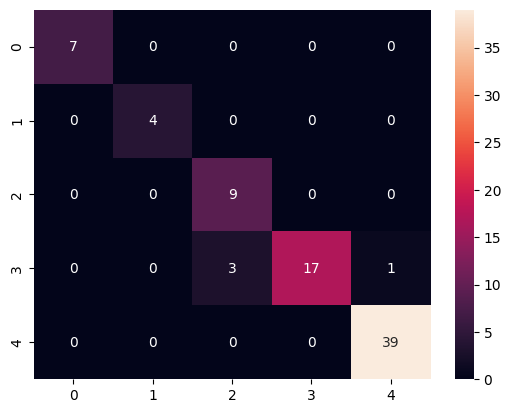

In [25]:
from sklearn import metrics
y_predict = tree_model.predict(X_test)
print(classification_report(y_test, y_predict))
print('Decision Trees\'s  Accuracy: ',metrics.accuracy_score(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

**Cross-validation**

In [26]:
predict = cross_val_predict(tree_model, X, y, cv=5)
print(classification_report(y, predict))

              precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



**Grafik**

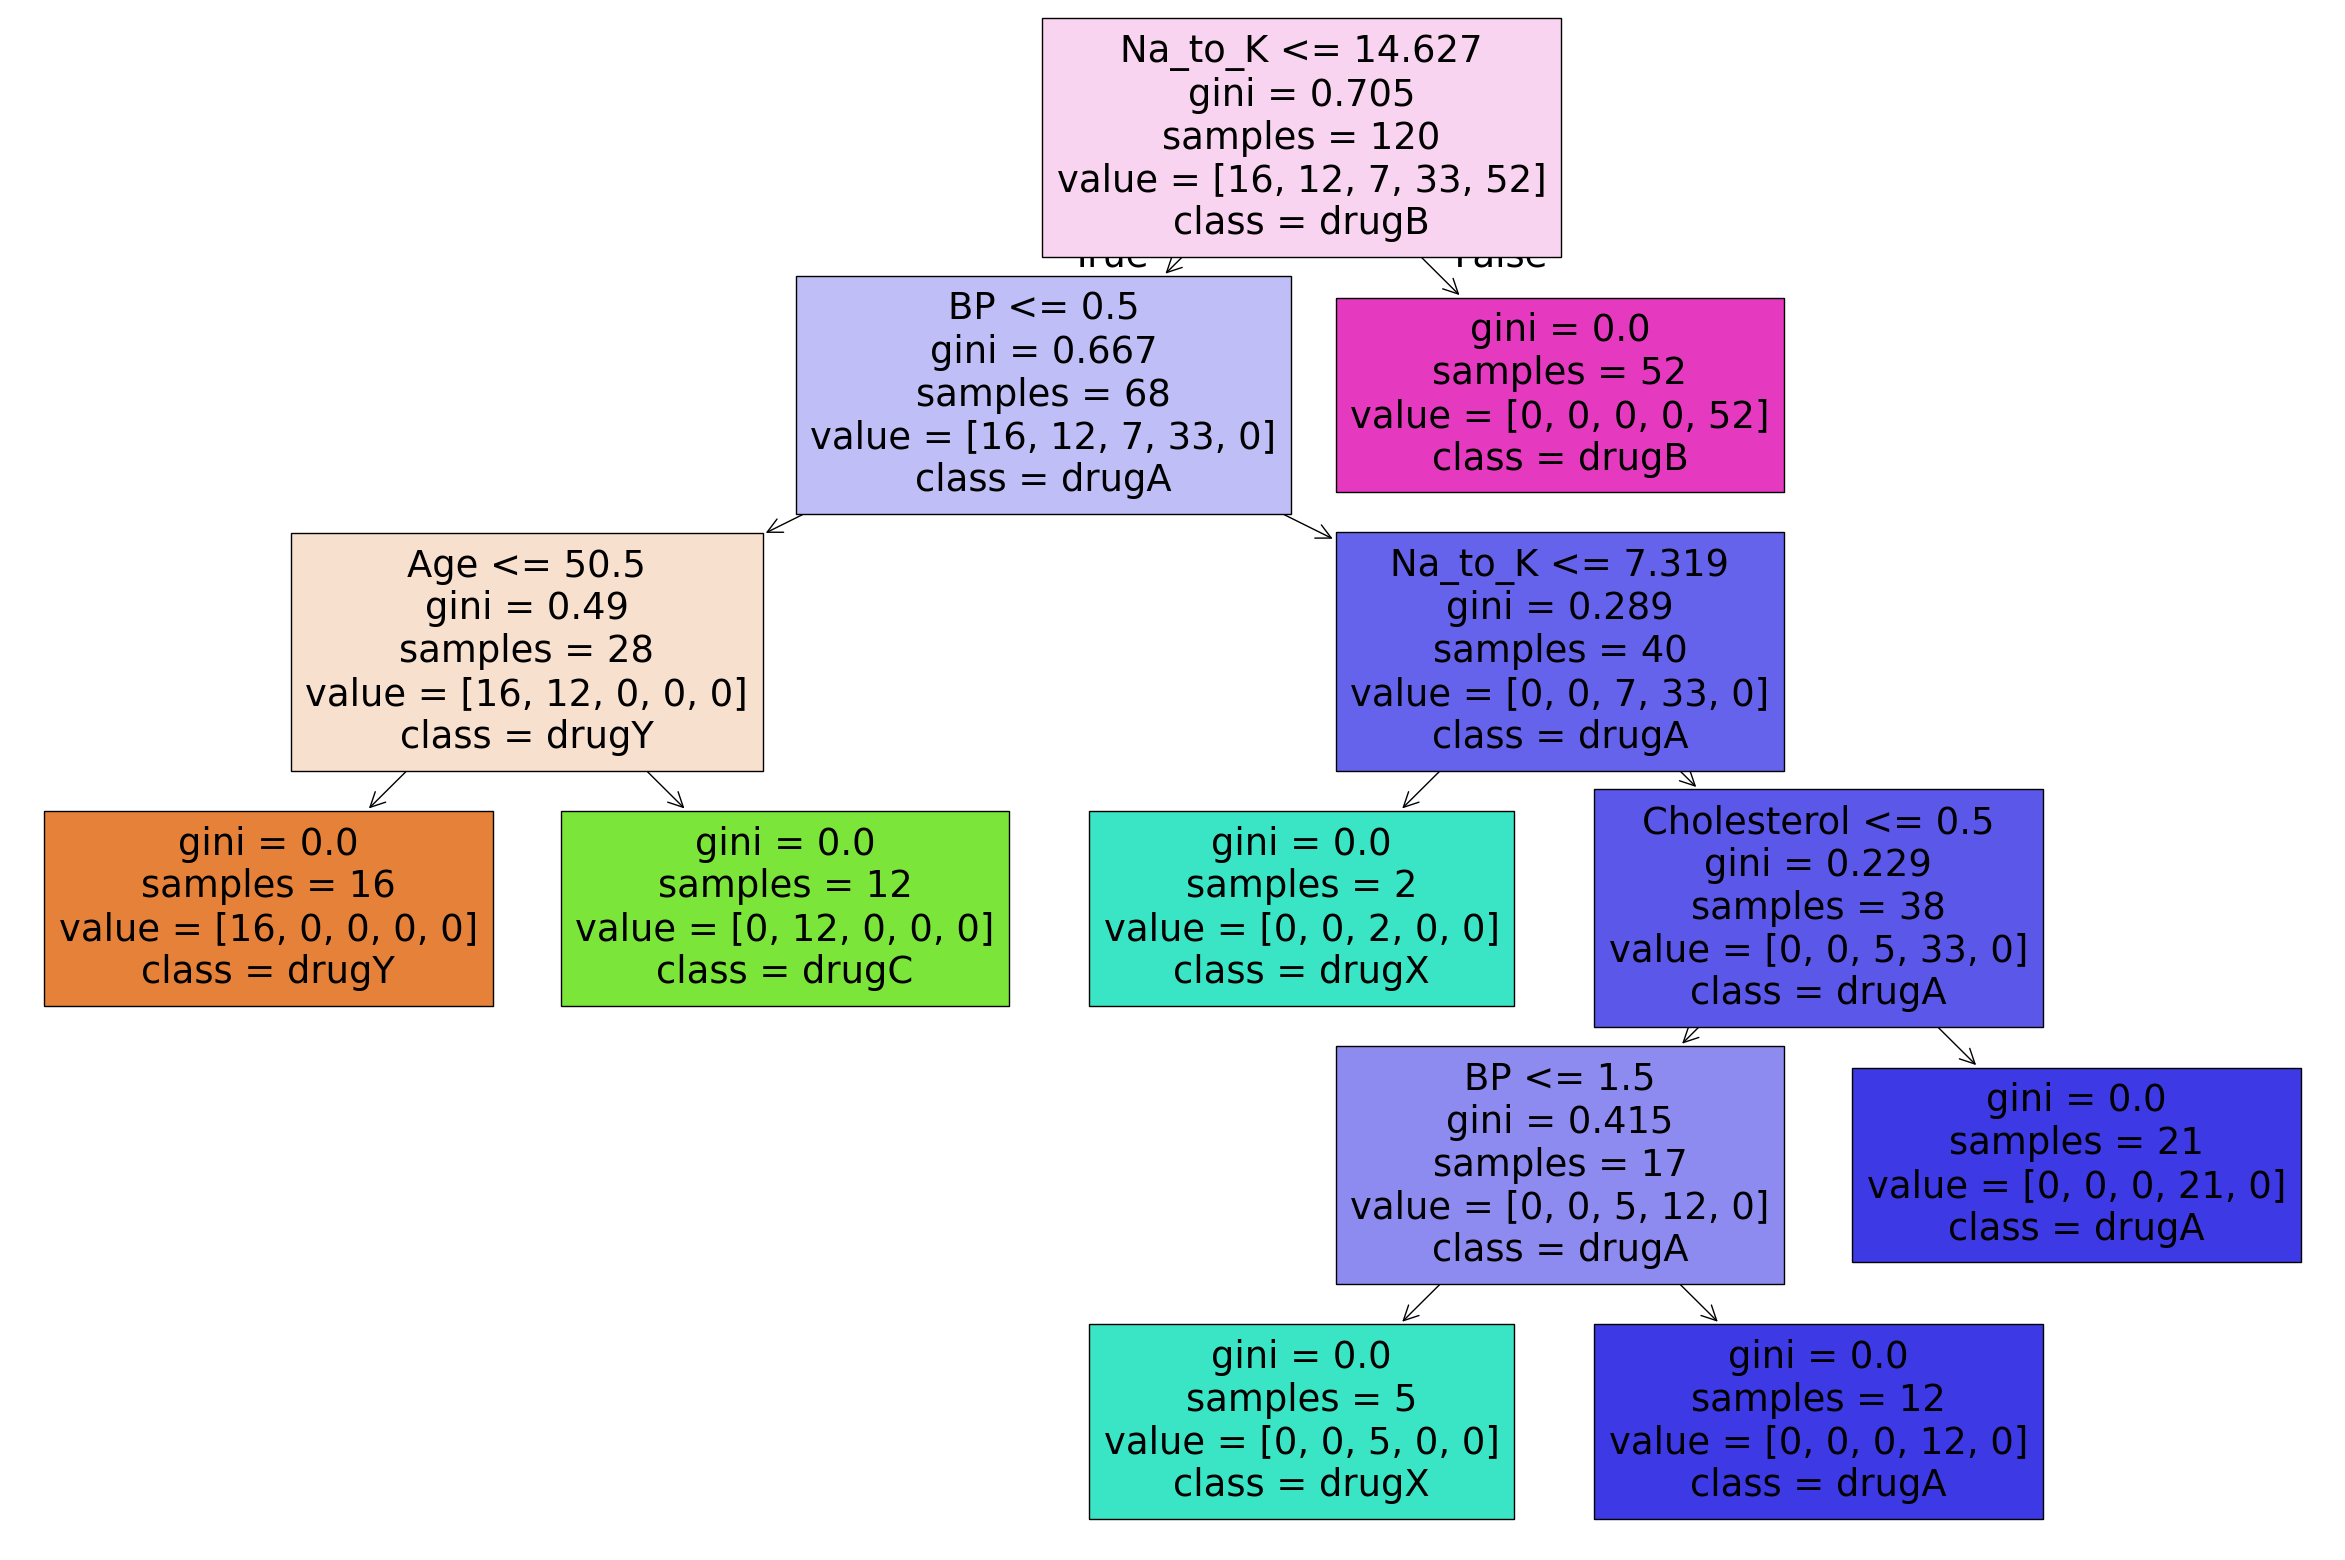

In [28]:
cols = df.drop('Drug',axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

**Hyperparameters**

Har bir model o'ziga xos giperparametrlar bilan keladi, biz bu parametrlarni sozlash orqali model aniqligini yoki tezligini oshirishimiz mumkin. k-NN uchun bu k ya'ni qo'shnilar soni edi. Decision Tree dan esa bir nechta giperparametrlar mavjud.

min_impurity_decrease - Natija qanchalik toza bo'lishini belgilaydi.  Standart qiymat 0.

Decision Trees's  Accuracy:  0.7375


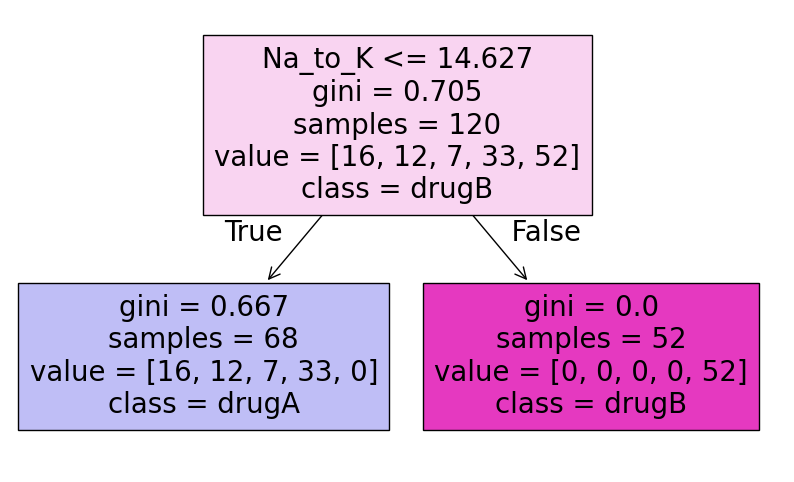

In [31]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.2)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print('Decision Trees\'s  Accuracy: ',metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,6))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

max-depth - shajara qavatlar soni

Decision Trees's  Accuracy:  0.8375


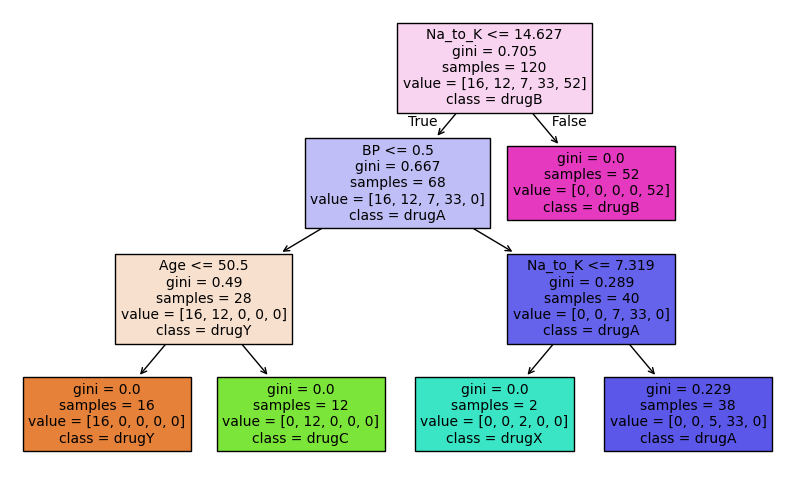

In [33]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01,max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print('Decision Trees\'s  Accuracy: ',metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,6))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

min_samples_leaf - leaf node ( yakuniy barg tugun) hosil qilish uhcun eng kam elementlar soni

Decision Trees's  Accuracy:  0.875


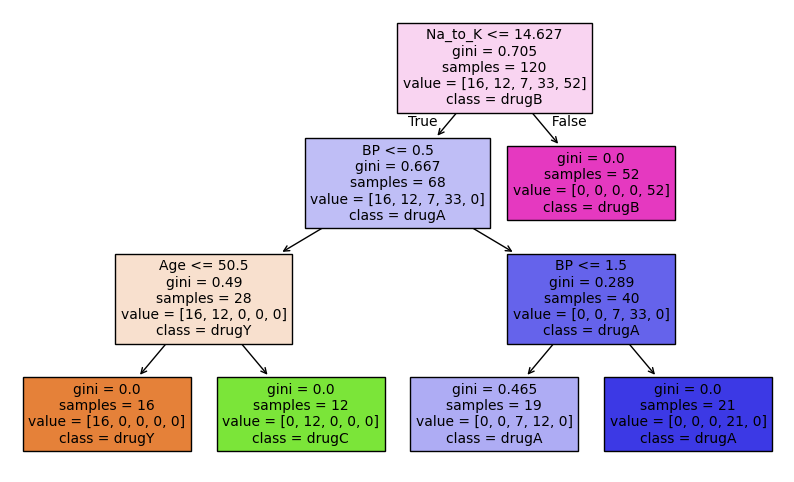

In [34]:
tree_model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print('Decision Trees\'s  Accuracy: ',metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,6))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()


**Random Forest**

**Decision Tree - da bitta daraxt yasaladi va tarmoqlanadi. Random Forest da bir nechta daraxt yasaladi va tarmoqlanadi. Random Forest bir nechta Decision Tree lardan iborat. Har bir Decision Treedan chiqgan natija ovozga qo'yiladi. Qaysi biri ko'proq ovoz olsa o'shani yakuniy natija deb hisoblaymiz.**

n-estimators - o'rmondagi daraxtlar soni

In [35]:
rf_model = RandomForestClassifier(n_estimators=10)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
print(classification_report(y_test, y_predict))
print('Random Forest\'s Accuracy: ',metrics.accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.89      0.94         9
       drugX       0.95      0.95      0.95        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.97        80
   macro avg       0.99      0.97      0.98        80
weighted avg       0.98      0.97      0.97        80

Random Forest's Accuracy:  0.975
